In [9]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [11]:
import pandas as pd

In [12]:
df = pd.read_excel("contsbyyear.xlsx")
df

,continent,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s,2020s
0,Africa,0,0,0,0,6,469,3,0,0
1,Asia,26,166,545,394,170,180,88,54,1
2,Europe,2497,2258,3403,3028,2136,1740,1830,609,25
3,North America,3181,3762,8973,6304,4581,4416,4569,1929,184
4,South America,90,245,794,450,235,339,266,166,21
5,Australia,1,2,20,78,55,18,19,4,2


In [13]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [14]:
!pip install rpy2


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [17]:
%%R

# Ensure the readxl library is available
library(readxl)

# Read data
df <- read_xlsx('contsbyyear.xlsx')
print(df)


# A tibble: 6 × 10
  continent     `1940s` `1950s` `1960s` `1970s` `1980s` `1990s` `2000s` `2010s`
  <chr>           <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1 Africa              0       0       0       0       6     469       3       0
2 Asia               26     166     545     394     170     180      88      54
3 Europe           2497    2258    3403    3028    2136    1740    1830     609
4 North America    3181    3762    8973    6304    4581    4416    4569    1929
5 South America      90     245     794     450     235     339     266     166
6 Australia           1       2      20      78      55      18      19       4
# ℹ 1 more variable: `2020s` <dbl>


Error in `geom_histogram()`:
! Problem while computing stat.
ℹ Error occurred in the 1st layer.
Caused by error in `setup_params()`:
! `stat_bin()` requires an x or y aesthetic.
Run `rlang::last_trace()` to see where the error occurred.


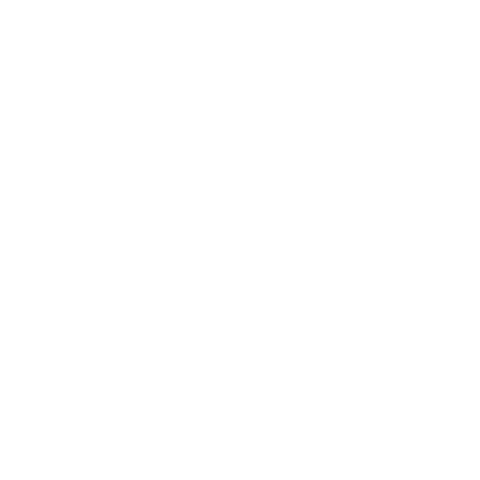

RRuntimeError: Error in geom_histogram() : 
ℹ Error occurred in the 1st layer.
Caused by error in `setup_params()`:
! `stat_bin()` requires an x or y aesthetic.


In [18]:
%%R

# Plot
ggplot(df) + geom_histogram()

In [19]:
!pip install plotnine



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [37]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, labs, theme, element_text

# Load the dataset
df = pd.read_excel('contsbyyear.xlsx')

# Melt the dataframe to transform it from wide to long format
df_long = pd.melt(df, id_vars=['continent'], var_name='Decade', value_name='Number_of_Artists')

# Display the transformed dataframe
print(df_long.head())


       continent Decade  Number_of_Artists
0         Africa  1940s                  0
1           Asia  1940s                 26
2         Europe  1940s               2497
3  North America  1940s               3181
4  South America  1940s                 90


In [50]:
print(df_long)

        continent Decade  Number_of_Artists
0          Africa  1940s                  0
1            Asia  1940s                 26
2          Europe  1940s               2497
3   North America  1940s               3181
4   South America  1940s                 90
5       Australia  1940s                  1
6          Africa  1950s                  0
7            Asia  1950s                166
8          Europe  1950s               2258
9   North America  1950s               3762
10  South America  1950s                245
11      Australia  1950s                  2
12         Africa  1960s                  0
13           Asia  1960s                545
14         Europe  1960s               3403
15  North America  1960s               8973
16  South America  1960s                794
17      Australia  1960s                 20
18         Africa  1970s                  0
19           Asia  1970s                394
20         Europe  1970s               3028
21  North America  1970s        

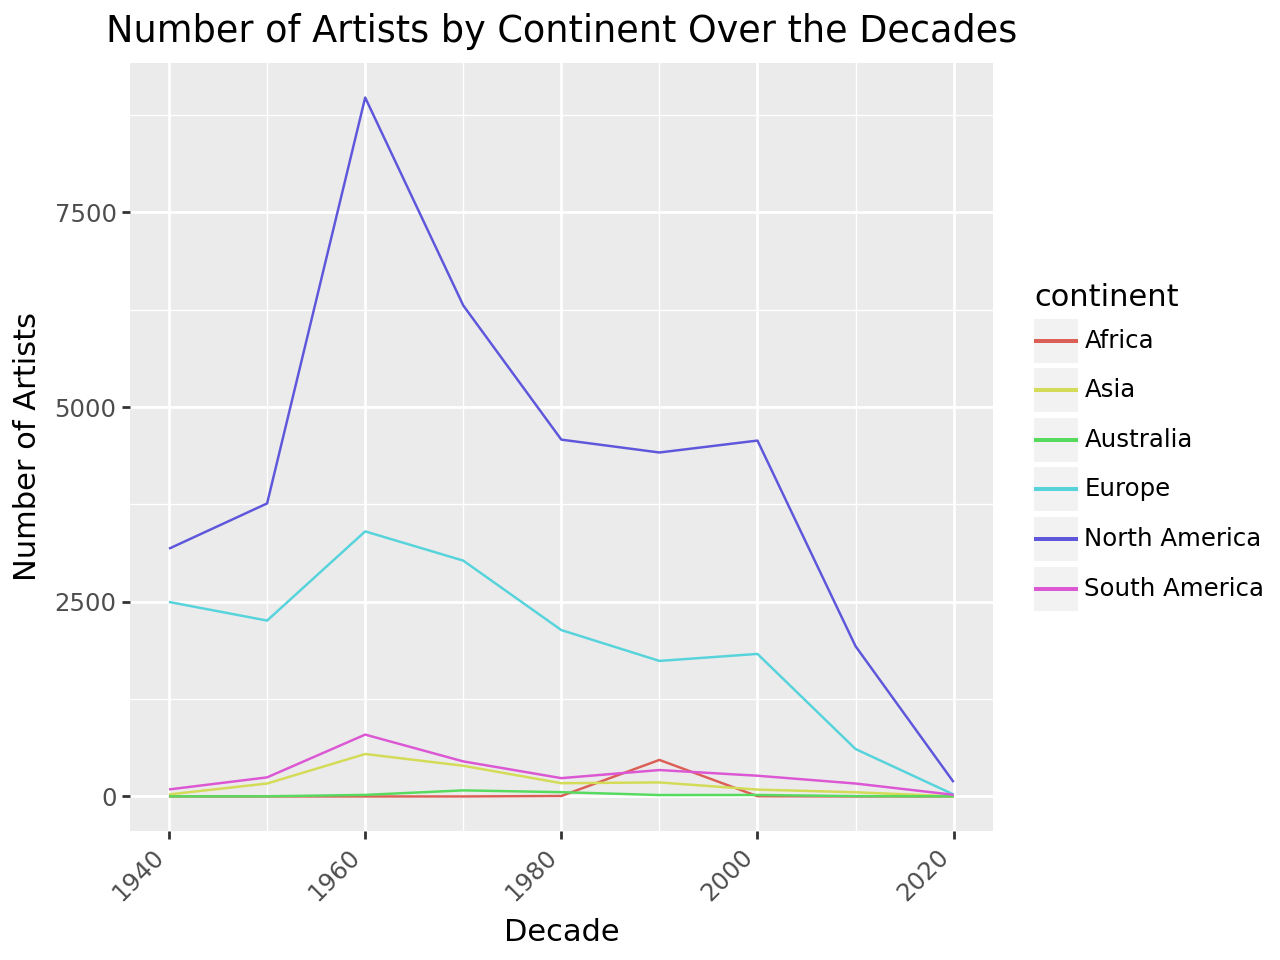

In [41]:
from plotnine import ggplot, aes, geom_line, labs, theme, element_text
import pandas as pd

# Load the dataset
df = pd.read_excel('contsbyyear.xlsx')

# Melt the dataframe to transform it from wide to long format
df_long = pd.melt(df, id_vars=['continent'], var_name='Decade', value_name='Number_of_Artists')

# Convert 'Decade' to a numeric type (for plotting purposes)
# Attempt to extract the first 4 characters of the 'Decade' and convert to integer
df_long['Decade'] = pd.to_numeric(df_long['Decade'].str[:4], errors='coerce')

# Create the line chart using the transformed dataframe
plot = (ggplot(df_long, aes(x='Decade', y='Number_of_Artists', group='continent', color='continent')) +
        geom_line() +
        labs(title='Number of Artists by Continent Over the Decades',
             x='Decade',
             y='Number of Artists') +
        theme(axis_text_x=element_text(rotation=45, hjust=1))
       )

# Display the plot
plot


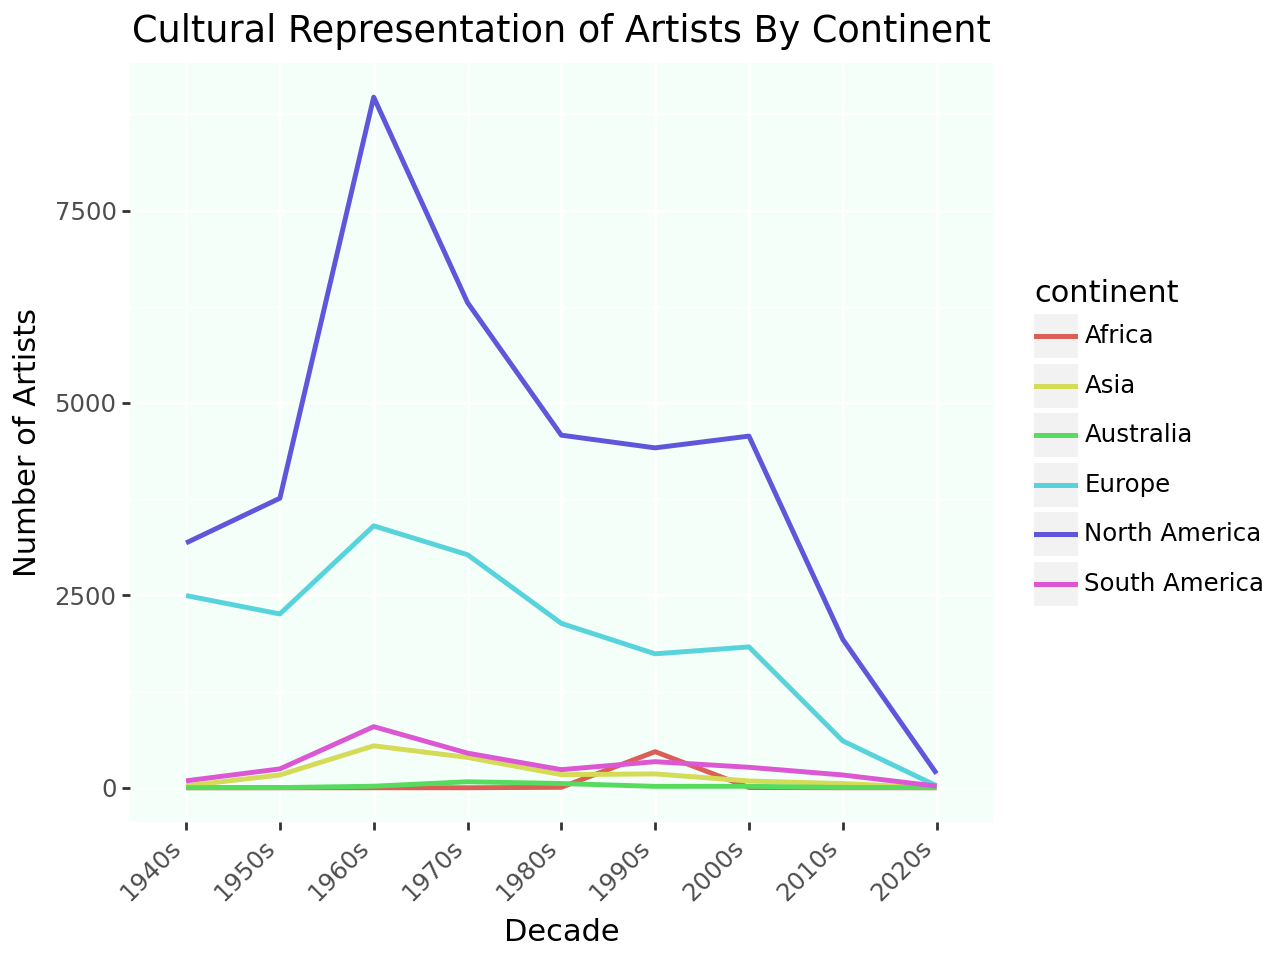

In [57]:
from plotnine import ggplot, aes, geom_line, labs, theme, element_text, element_rect
import pandas as pd

# Assuming df_long is your already prepared DataFrame

# Create the line chart with thicker lines
plot = (ggplot(df_long, aes(x='Decade', y='Number_of_Artists', group='continent', color='continent')) +
        geom_line(size=1) +  # Adjust line thickness here
        labs(title='Cultural Representation of Artists By Continent',
             x='Decade',
             y='Number of Artists') +
        theme(axis_text_x=element_text(rotation=45, hjust=1),
              panel_background=element_rect(fill='#F5FFFA', color=None))  # Light blue background
       )

# Display the plot
plot
